<h1>Heart Disease UCI Analysis </h1>
<p>This notebook is demonstrating data analytics and visualization on the Heart disease UCI data set which was available on Kaggle(<a href="https://www.kaggle.com/ronitf/heart-disease-uci">Data</a>)</p>

<h3>Importing Libraries</h3>

In [20]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
np.random.seed(0) #random seed for debugging 

<h3> Exploratory Data Analysis </h3>

In [3]:
#reading the csv file
data = pd.read_csv('D:\\Coding\\data_science\\Tests\\DAV\\heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Lets check the basic statistical figures of the given data set

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#count of people diagnosed with heart disease
len(data[data['target']==1])

165

In [6]:
#count of people not diagnosed with heart disease
len(data[data['target']==0])

138

Lets visualize some of the features

First lets have a look at the chest pain type attribute(cp)
cp has 4 values<br/>
1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic<br/>
Lets see which pain dominates among the people diagnosed with heart disease

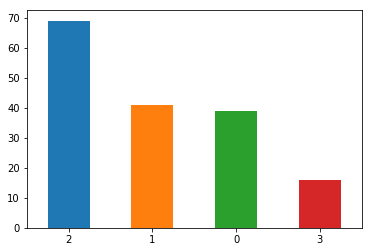

In [7]:
temp=data[data['target']==1]
temp['cp'].value_counts().plot.bar(rot=0)

<i><strong>Looks like atypical angina is the most serious indicator of heart disease in chest pain</i></strong>

Lets look at the distribution of age in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F288FD6D8>]],
      dtype=object)

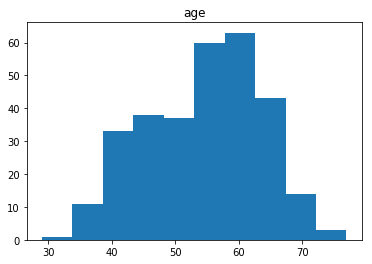

In [8]:
data.hist(column='age',bins=10,grid=False)

Most people seem to be between the age of 55-65 in the collected dataset<br/>
Now lets the look at the age distribution for people diagnosed with heart disease

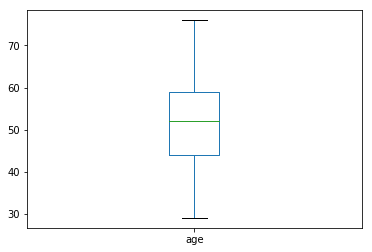

In [9]:
temp.boxplot(column='age',grid=False)

As evident from the boxplot the age of people lie roughly between 44 to 60 with mean around 51

Relation between age and cholestrol level of heart disease diagnosed patients

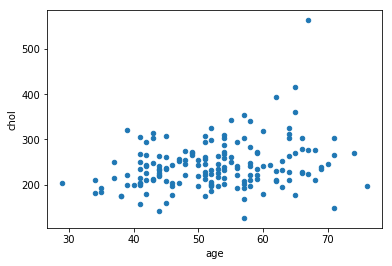

In [10]:
temp.plot.scatter(x='age',y='chol')

<b>Seems Linear</b>

Now its time to see the correlation between the features and thus try to find out which features are important and which are redundant.

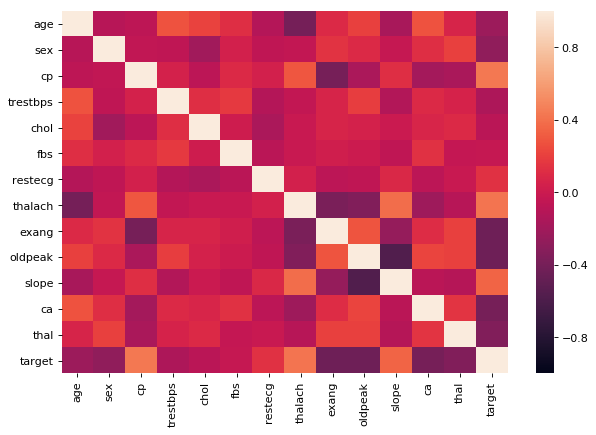

In [11]:
cr=data.corr()
fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(cr,vmin=-1,vmax=1)

Lets look at the correlation of features with the target

In [12]:
cr['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

As you can see features like fbs and chol have a very low correlation with respect to the target hence they dont provide much information. So we can drop the features which will make our model less complex and more accurate.

Lets drop these features now

In [13]:
data.drop(['fbs','chol'],axis=1).head(5)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


<i>There our EDA is over now lets move on the predcition!</i>

<h1>Prediction</h1>

In [14]:
#dividing data into target and features
y=data['target']
X=data.drop(['target'],axis=1)

Next we split our dataset into training and testing sets. We use sklearn's built in funtion for this purpose

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

We are going to use 2 classifiers for prediction, first lets go with the simple and easy KNN classifier algorithm

I am not going to explain the algorithm here, if you wanna know more about it here's a great introduction to <a href="https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7">KNN </a><br/>
Now KNN requires 1 hyperparameter which is 'K' the number neighbors to consider. Lets use sklearn's gridsearch function to find the best value of K to get the highest accuracy

In [16]:
param_grid = { 
    'n_neighbors': list(range(1,50))
}
knn=KNeighborsClassifier()
CV_rfc = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'n_neighbors': 17}


We have got 12 as the best value of K, Lets see how our model predicts now with this value

In [17]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores.mean())

0.6648550724637681


<i>66.48% accuracy doesn't seem great, lets try a better classifier the <b>Random Forest</b></i>

Again you can find out more about <i>Random Forest</i> <a href="https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd">here </a>.<br/>
Random forest has mainly 2 hyperparameters which are n_estimators(the number of trees in the forest) and the max_depth(depth of the tree. Lets use the gridsearch to find out the best hyperparamters.

In [18]:
param_grid = { 
    'n_estimators': list(range(5,35)),
    'max_depth' : list(range(2,30))
}
clf=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 16, 'n_estimators': 25}


Lets use the given values

In [19]:
clf=RandomForestClassifier(n_estimators=25,max_depth=16)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.831340579710145


So with <i>Random forest</i> our accuracy has jumped to  <b>83.13%</b>. Thats really good considering we had only 303 samples.

<h1>Summary</h1>

<i>So in this noteook I first showed various statistics and visualizations of the data using <b>pandas</b> and <b>seaborn</b> library. <br/>
Then I started with the prediction models using the <b>Sklearn</b> library. I used the gridsearch to find out the best hyperparameters for both the models and compared their accuracy which showed <b>Random Forest</b> doing way better than <b>KNN</b><br/>
Thank you